In [1]:
import matplotlib.pyplot as plt
import pandas as pd

        Wall time   Step       Value
0    1.694986e+09    0.0  -76.109741
1    1.694986e+09    1.0 -104.988304
2    1.694986e+09    2.0 -103.327385
3    1.694986e+09    3.0  -86.743568
4    1.694986e+09    4.0  -79.425659
..            ...    ...         ...
455  1.694988e+09  455.0   73.418312
456  1.694988e+09  456.0  157.080643
457  1.694988e+09  457.0  169.299057
458  1.694988e+09  458.0   50.384689
459  1.694988e+09  459.0  161.736099

[460 rows x 3 columns]


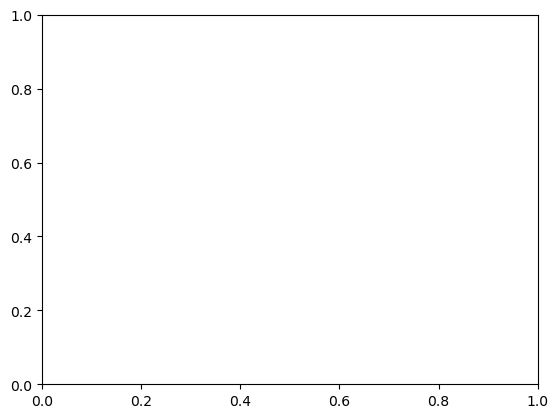

In [2]:
df = pd.read_csv("Plot_Data/ppo_log_1694985469.csv")
df = pd.DataFrame(df)
ax = plt.gca()
df_groupby = df.groupby(df.index)
data_avg = df_groupby.mean()
print(data_avg)

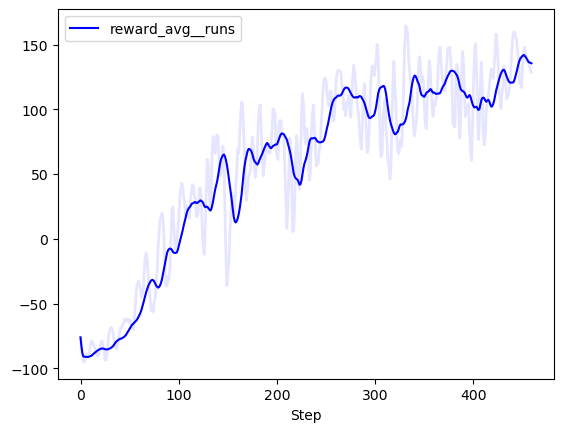

In [4]:
df = pd.read_csv("Plot_Data/ppo_log_1694985469.csv")
df = pd.DataFrame(df)
ax = plt.gca()
df_groupby = df.groupby(df.index)
data_avg = df_groupby.mean()
data_avg['reward_smooth'] = data_avg['Value'].rolling(window=20, win_type='triang', min_periods=1).mean()
data_avg['reward_var'] = data_avg['Value'].rolling(window=5, win_type='triang', min_periods=1).mean()

data_avg.plot(kind='line', x='Step' , y='reward_smooth',ax=ax,color='blue',  linewidth=1.5, alpha=1)
data_avg.plot(kind='line', x='Step' , y='reward_var',ax=ax,color='blue',  linewidth=2, alpha=0.1)

# keep only reward_smooth in the legend and rename it
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[0]], ["reward_avg_"  + "_runs"], loc=2)


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


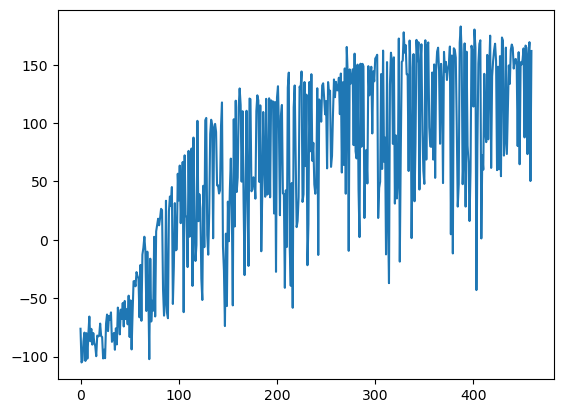

In [5]:
plt.plot(df.Step, df.Value)
plt.show()